<a href="https://colab.research.google.com/github/RadjaLouail/NLP_Final_Assignment/blob/main/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("tweets-data.csv")
df_sample = df.sample(n=500, random_state=42)

In [10]:
import re
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^A-Za-z0-9\s]', '', tweet)
    tweet = tweet.lower()
    tweet = tweet.strip()
    return tweet
    df_sample["Cleaned_Tweet"] = df_sample["Tweets"].astype(str).apply(clean_tweet)

In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score_dict = sia.polarity_scores(text)
    compound = score_dict['compound']
    if compound >= 0.05:
        label = "Positive"
    elif compound <= -0.05:
        label = "Negative"
    else:
        label = "Neutral"
    return pd.Series([label, compound])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
df_sample["Cleaned_Tweet"] = df_sample["Tweets"].astype(str).apply(clean_tweet)


In [15]:
df_sample[['VADER_Label', 'VADER_Score']] = df_sample["Cleaned_Tweet"].apply(lambda x: pd.Series(vader_sentiment(x)))


In [16]:
from transformers import pipeline

# Charger le modèle pré-entraîné
transformer_classifier = pipeline("sentiment-analysis")

# Fonction pour transformer un texte en label + score
def transformer_sentiment(text):
    result = transformer_classifier(text[:512])[0]  # couper à 512 caractères max
    return pd.Series([result['label'], result['score']])

# Appliquer au DataFrame
df_sample[['Transformer_Label', 'Transformer_Score']] = df_sample["Cleaned_Tweet"].apply(lambda x: transformer_sentiment(x))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [17]:
print(df_sample[['Tweets', 'VADER_Label', 'VADER_Score', 'Transformer_Label', 'Transformer_Score']].head(10))


                                                 Tweets VADER_Label  \
2899  Le #DessinDePresse de Sanaga : ls sont morts c...    Positive   
594   #Russia #Wagner #RussiaCivilWar https://t.co/P...     Neutral   
2870  Exclusive content -https://t.co/oEiSIIB2Z1\n.\...    Negative   
52    Auch heute geht die politische Nachricht des T...    Negative   
1391  @crazyclipsonly Same type that would take a ho...     Neutral   
807   #SUGA_AgustD_TOUR_in_Seoul #SUGA_AgustD_TOUR #...     Neutral   
2761  #Titan mishap: #Implosion with incredible forc...    Negative   
196                                     #Wagner #Russia     Neutral   
1576  #merri le #titanic 2 le retour https://t.co/4s...     Neutral   
670   Il Segretario di Stato americano #Blinken: "no...     Neutral   

      VADER_Score Transformer_Label  Transformer_Score  
2899       0.4767          NEGATIVE           0.981537  
594        0.0000          NEGATIVE           0.962062  
2870      -0.4404          NEGATIVE           0

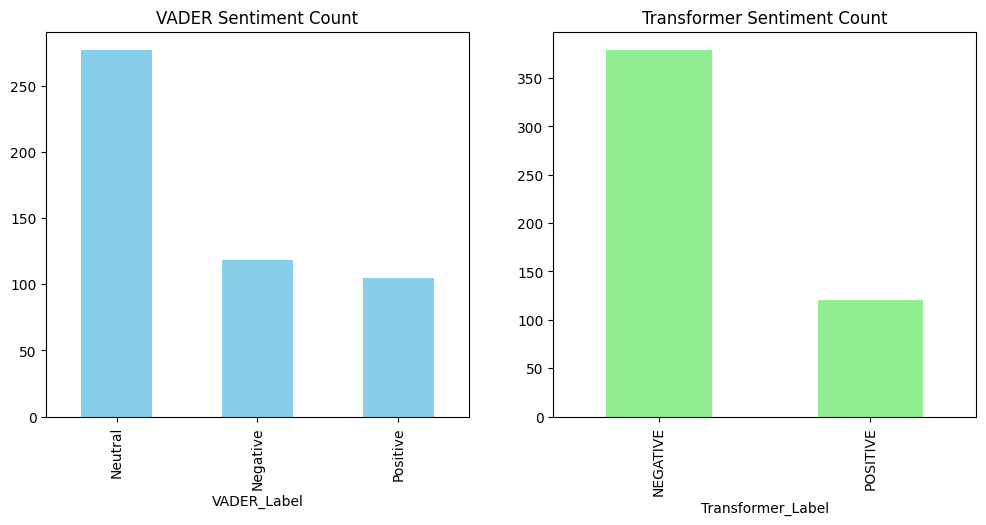

In [18]:
import matplotlib.pyplot as plt

# Comparaison des labels
vader_counts = df_sample['VADER_Label'].value_counts()
transformer_counts = df_sample['Transformer_Label'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

vader_counts.plot(kind='bar', ax=ax[0], title="VADER Sentiment Count", color='skyblue')
transformer_counts.plot(kind='bar', ax=ax[1], title="Transformer Sentiment Count", color='lightgreen')

plt.show()
